In [26]:
import pandas as pd
pd.options.display.max_columns=1000
pd.options.display.width=200
pd.options.display.min_rows=60
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn import preprocessing

In [3]:
df =  pd.read_csv('data/data_cleaned1.csv')
df.head()

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,CHROM_1,CHROM_2,CHROM_3,CHROM_4,CHROM_5,CHROM_6,CHROM_7,CHROM_8,CHROM_9,CHROM_10,CHROM_11,CHROM_12,CHROM_13,CHROM_14,CHROM_15,CHROM_16,CHROM_16.1,CHROM_17,CHROM_18,CHROM_19,CHROM_20,CHROM_21,CHROM_22,CHROM_MT,CHROM_X,CLNVC_Deletion,CLNVC_Duplication,CLNVC_Indel,CLNVC_Insertion,CLNVC_Inversion,CLNVC_Microsatellite,CLNVC_single_nucleotide_variant,INT,EX,SIFT_deleterious,SIFT_deleterious_low_confidence,SIFT_tolerated,SIFT_tolerated_low_confidence,SIFT_unknown,BIOTYPE_misc_RNA,BIOTYPE_protein_coding,BIOTYPE_unknown
0,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955563G>C,NaN,NaN,SO:0001583|missense_variant,1.0,0.0,0,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,1/39,NaN,61,11,4,R/P,cGg/cCg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.955597G>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,1/39,NaN,95,45,15,P,ccG/ccT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
2,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955619G>C,NaN,NaN,SO:0001583|missense_variant,1.0,0.0,1,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,1/39,NaN,117,67,23,V/L,Gtc/Ctc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.957640C>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,2/39,NaN,311,261,87,D,gaC/gaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
4,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.976059C>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,1,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,4/39,NaN,576,526,176,L,Ctg/Ttg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 84 columns):
POS                                65188 non-null int64
REF                                65188 non-null object
ALT                                65188 non-null object
AF_ESP                             65188 non-null float64
AF_EXAC                            65188 non-null float64
AF_TGP                             65188 non-null float64
CLNDISDB                           65188 non-null object
CLNDISDBINCL                       76 non-null object
CLNDN                              65188 non-null object
CLNDNINCL                          76 non-null object
CLNHGVS                            65188 non-null object
CLNSIGINCL                         76 non-null object
CLNVI                              27659 non-null object
MC                                 58219 non-null object
ORIGIN                             65188 non-null float64
SSR                                65188 n

In [5]:
# select only columns with int or float data types
df = df.select_dtypes(['number'])
len(df)

65188

In [6]:
# drop any columns with null values
df.dropna(axis=1,inplace=True)

In [7]:
# create a mask and filter out the minority class and majority class from the dataset
mask = df['CLASS'] == 1
df_minority = df[mask]
df_majority = df[~mask]


In [8]:
df_minority.head()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,SSR,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW,CHROM_1,CHROM_2,CHROM_3,CHROM_4,CHROM_5,CHROM_6,CHROM_7,CHROM_8,CHROM_9,CHROM_10,CHROM_11,CHROM_12,CHROM_13,CHROM_14,CHROM_15,CHROM_16,CHROM_16.1,CHROM_17,CHROM_18,CHROM_19,CHROM_20,CHROM_21,CHROM_22,CHROM_MT,CHROM_X,CLNVC_Deletion,CLNVC_Duplication,CLNVC_Indel,CLNVC_Insertion,CLNVC_Inversion,CLNVC_Microsatellite,CLNVC_single_nucleotide_variant,INT,EX,SIFT_deleterious,SIFT_deleterious_low_confidence,SIFT_tolerated,SIFT_tolerated_low_confidence,SIFT_unknown,BIOTYPE_misc_RNA,BIOTYPE_protein_coding,BIOTYPE_unknown
2,955619,0.0000,0.03475,0.0088,1.0,0.0,1,1.0,0.421,3.288,0.069819,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
4,976059,0.0000,0.00022,0.0010,1.0,0.0,1,1.0,0.421,17.740,2.234711,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
25,981353,0.0016,0.00209,0.0010,1.0,0.0,1,1.0,0.421,22.600,3.143885,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
38,983256,0.0000,0.00007,0.0002,1.0,0.0,1,1.0,0.421,10.240,0.928177,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
49,985070,0.0028,0.00498,0.0008,1.0,0.0,1,1.0,0.421,22.900,3.358660,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0


In [9]:
df_majority.shape

(48754, 53)

In [10]:
# resample the minority class to have the same length as the majority class
df_minority = df_minority.sample(len(df_majority),replace=True)

In [11]:
df_minority.shape

(48754, 53)

In [12]:
df_minority.head()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,SSR,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW,CHROM_1,CHROM_2,CHROM_3,CHROM_4,CHROM_5,CHROM_6,CHROM_7,CHROM_8,CHROM_9,CHROM_10,CHROM_11,CHROM_12,CHROM_13,CHROM_14,CHROM_15,CHROM_16,CHROM_16.1,CHROM_17,CHROM_18,CHROM_19,CHROM_20,CHROM_21,CHROM_22,CHROM_MT,CHROM_X,CLNVC_Deletion,CLNVC_Duplication,CLNVC_Indel,CLNVC_Insertion,CLNVC_Inversion,CLNVC_Microsatellite,CLNVC_single_nucleotide_variant,INT,EX,SIFT_deleterious,SIFT_deleterious_low_confidence,SIFT_tolerated,SIFT_tolerated_low_confidence,SIFT_unknown,BIOTYPE_misc_RNA,BIOTYPE_protein_coding,BIOTYPE_unknown
64874,153296314,0.0000,0.00000,0.0000,0.0,0.0,1,-1.0,0.00365,25.400,5.115869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
25881,55537560,0.0117,0.01273,0.0102,0.0,0.0,1,1.0,0.49700,6.974,0.442365,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
25537,6299654,0.0000,0.00243,0.0084,1.0,0.0,1,1.0,0.74200,2.931,0.035096,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
63039,40757509,0.0001,0.00121,0.0008,1.0,0.0,1,1.0,0.18300,28.300,6.105884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
1629,53676718,0.0000,0.00000,0.0000,1.0,0.0,1,1.0,0.13100,2.881,0.030137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [13]:
# concatenate the minority (resampled) and majority class dataframes back together
df = pd.concat([df_minority,df_majority])

In [14]:
# create a series for the binary result being predicted
var_class = df.pop('CLASS')

In [15]:
# verify that CLASS column has been dropped from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97508 entries, 64874 to 65183
Data columns (total 52 columns):
POS                                97508 non-null int64
AF_ESP                             97508 non-null float64
AF_EXAC                            97508 non-null float64
AF_TGP                             97508 non-null float64
ORIGIN                             97508 non-null float64
SSR                                97508 non-null float64
STRAND                             97508 non-null float64
LoFtool                            97508 non-null float64
CADD_PHRED                         97508 non-null float64
CADD_RAW                           97508 non-null float64
CHROM_1                            97508 non-null int64
CHROM_2                            97508 non-null int64
CHROM_3                            97508 non-null int64
CHROM_4                            97508 non-null int64
CHROM_5                            97508 non-null int64
CHROM_6                      

In [40]:
hyperparam_table = []

In [41]:
def compare_dicts(a,b,ignore=['test_score','train_score']):
    a = dict(a)
    b = dict(b)
    for k in ignore:
        a.pop(k,None)
        b.pop(k,None)
        
    return tuple(a.items()) == tuple(b.items())
    

In [42]:
exists = any([compare_dicts(a,b={'test_size': 0.10, 
                                'random_state': 0, 
                                'data_size': str(df.shape),
                                'scaling':'no_scaling'}) 
              for a in hyperparam_table])

logisticRegr = LogisticRegression()
if not exists:
    x_train,x_test,y_train,y_test = train_test_split(df,var_class,test_size=0.10,random_state=0)
    hyperparam_table += [{'test_size': 0.10, 
                          'random_state': 0, 
                          'data_size': str(df.shape),
                          'scaling':'no_scaling'}]
    
    logisticRegr.fit(x_train,y_train)
    
    predictions_test = logisticRegr.predict(x_test)
    predictions_train = logisticRegr.predict(x_train)
    
    score = logisticRegr.score(x_test,y_test)
    hyperparam_table[-1]['test_score'] = score
    
    training_score = logisticRegr.score(x_train,y_train)
    hyperparam_table[-1]['train_score'] = training_score
    
    tn, fp, fn, tp = confusion_matrix(y_test,predictions_test).ravel()
    hyperparam_table[-1]['tn'] = tn
    hyperparam_table[-1]['fp'] = fp
    hyperparam_table[-1]['fn'] = fn
    hyperparam_table[-1]['tp'] = tp
    
    f1 = f1_score(y_test,predictions_test)
    hyperparam_table[-1]['f1_score'] = f1
    precision = precision_score(y_test,predictions_test)
    hyperparam_table[-1]['precision'] = precision
    recall = recall_score(y_test,predictions_test)
    hyperparam_table[-1]['recall'] = recall
    hyperparam_table[-1]['feature_importances'] = logisticRegr.coef_
    

/home/gksullan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)

exists = any([compare_dicts(a,b={'test_size': 0.05, 
                                'random_state': 0, 
                                'data_size': str(df.shape),
                                'scaling':'min_max'}) 
              for a in hyperparam_table])

logisticRegr = LogisticRegression()
if not exists:
    x_train,x_test,y_train,y_test = train_test_split(scaled_df,var_class,test_size=0.05,random_state=0)
    hyperparam_table += [{'test_size': 0.05, 
                          'random_state': 0, 
                          'data_size': str(df.shape),
                          'scaling':'min_max'}]
    
    logisticRegr.fit(x_train,y_train)
    
    predictions_test = logisticRegr.predict(x_test)
    predictions_train = logisticRegr.predict(x_train)
    
    score = logisticRegr.score(x_test,y_test)
    hyperparam_table[-1]['test_score'] = score
    
    training_score = logisticRegr.score(x_train,y_train)
    hyperparam_table[-1]['train_score'] = training_score
    
    tn, fp, fn, tp = confusion_matrix(y_test,predictions_test).ravel()
    hyperparam_table[-1]['tn'] = tn
    hyperparam_table[-1]['fp'] = fp
    hyperparam_table[-1]['fn'] = fn
    hyperparam_table[-1]['tp'] = tp
    
    f1 = f1_score(y_test,predictions_test)
    hyperparam_table[-1]['f1_score'] = f1
    precision = precision_score(y_test,predictions_test)
    hyperparam_table[-1]['precision'] = precision
    recall = recall_score(y_test,predictions_test)
    hyperparam_table[-1]['recall'] = recall
    hyperparam_table[-1]['feature_importances'] = logisticRegr.coef_
    

/home/gksullan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
df_hyp = pd.DataFrame(hyperparam_table)
df_hyp.head(10)

,test_size,random_state,data_size,scaling,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances
0,0.10,0,"(97508, 52)",no_scaling,0.512358,0.498627,0,4755,0,4996,0.677562,0.512358,1.000000,"[[1.071547371757431e-10, -1.7239997227910878e-..."
1,0.05,0,"(97508, 52)",min_max,0.593929,0.599814,1090,1300,680,1806,0.645923,0.581455,0.726468,"[[0.008332656808381023, -5.644560587935973, -0..."


In [65]:
df = pd.read_csv('data_cleanednlp.csv')
df = df.select_dtypes(['number'])
df.dropna(axis=1,inplace=True)
mask = df['CLASS'] == 1
df_minority = df[mask]
df_majority = df[~mask]
df_minority = df_minority.sample(len(df_majority),replace=True)
df = pd.concat([df_minority,df_majority])
var_class = df.pop('CLASS')

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)


exists = any([compare_dicts(a,b={'test_size': 0.05, 
                                'random_state': 0, 
                                'data_size': str(df.shape),
                                'scaling':'min_max'}) 
              for a in hyperparam_table])

if not exists:
    x_train,x_test,y_train,y_test = train_test_split(scaled_df,var_class,test_size=0.05,random_state=0)
    hyperparam_table += [{'test_size': 0.05, 
                          'random_state': 0, 
                          'data_size': str(df.shape),
                          'scaling':'min_max'}]
    
    logisticRegr.fit(x_train,y_train)
    
    predictions_test = logisticRegr.predict(x_test)
    predictions_train = logisticRegr.predict(x_train)
    
    score = logisticRegr.score(x_test,y_test)
    hyperparam_table[-1]['test_score'] = score
    
    training_score = logisticRegr.score(x_train,y_train)
    hyperparam_table[-1]['train_score'] = training_score
    
    tn, fp, fn, tp = confusion_matrix(y_test,predictions_test).ravel()
    hyperparam_table[-1]['tn'] = tn
    hyperparam_table[-1]['fp'] = fp
    hyperparam_table[-1]['fn'] = fn
    hyperparam_table[-1]['tp'] = tp

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/gksullan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
df_hyp = pd.DataFrame(hyperparam_table)
df_hyp.head(15)

,test_size,random_state,data_size,scaling,test_score,train_score,confusion_matrix,tn,fp,fn,tp
0,0.10,0,"(97508, 32)",no_scaling,0.512358,0.498627,[[ 0 4755]\n [ 0 4996]],NaN,NaN,NaN,NaN
1,0.05,0,"(97508, 32)",min_max,0.585111,0.572761,[[ 929 1461]\n [ 562 1924]],NaN,NaN,NaN,NaN
2,0.10,0,"(97508, 32)",NaN,0.512358,0.498627,[[ 0 4755]\n [ 0 4996]],NaN,NaN,NaN,NaN
3,0.05,0,"(97508, 32)",NaN,0.585111,0.572761,[[ 929 1461]\n [ 562 1924]],NaN,NaN,NaN,NaN
4,0.01,0,"(65188, 32)",NaN,0.740798,0.747970,[[483 0]\n [169 0]],NaN,NaN,NaN,NaN
5,0.05,0,"(65188, 32)",NaN,0.742945,0.748159,[[2422 0]\n [ 838 0]],NaN,NaN,NaN,NaN
6,0.10,0,"(65188, 32)",NaN,0.745053,0.748215,[[4857 0]\n [1662 0]],NaN,NaN,NaN,NaN
7,0.05,0,"(65188, 32)",NaN,0.743252,0.748240,[[2422 0]\n [ 837 1]],NaN,NaN,NaN,NaN
8,0.10,0,"(97508, 44)",no_scaling,0.512358,0.498627,NaN,0.0,4755.0,0.0,4996.0
9,0.05,0,"(97508, 44)",min_max,0.575677,0.579616,NaN,1024.0,1366.0,703.0,1783.0


In [87]:
df = pd.read_csv('data_cleanednlp2.csv')
df = df.select_dtypes(['number'])
df.dropna(axis=1,inplace=True)
mask = df['CLASS'] == 1
df_minority = df[mask]
df_majority = df[~mask]
df_minority = df_minority.sample(len(df_majority),replace=True)
df = pd.concat([df_minority,df_majority])
var_class = df.pop('CLASS')

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)


exists = any([compare_dicts(a,b={'test_size': 0.05, 
                                'random_state': 0, 
                                'data_size': str(df.shape),
                                'scaling':'min_max'}) 
              for a in hyperparam_table])

if not exists:
    x_train,x_test,y_train,y_test = train_test_split(scaled_df,var_class,test_size=0.05,random_state=0)
    hyperparam_table += [{'test_size': 0.05, 
                          'random_state': 0, 
                          'data_size': str(df.shape),
                          'scaling':'min_max'}]
    
    logisticRegr.fit(x_train,y_train)
    
    predictions_test = logisticRegr.predict(x_test)
    predictions_train = logisticRegr.predict(x_train)
    
    score = logisticRegr.score(x_test,y_test)
    hyperparam_table[-1]['test_score'] = score
    
    training_score = logisticRegr.score(x_train,y_train)
    hyperparam_table[-1]['train_score'] = training_score
    
    tn, fp, fn, tp = confusion_matrix(y_test,predictions_test).ravel()
    hyperparam_table[-1]['tn'] = tn
    hyperparam_table[-1]['fp'] = fp
    hyperparam_table[-1]['fn'] = fn
    hyperparam_table[-1]['tp'] = tp

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/gksullan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
df_hyp = pd.DataFrame(hyperparam_table)
df_hyp.head(15)

,test_size,random_state,data_size,scaling,test_score,train_score,confusion_matrix,tn,fp,fn,tp
0,0.10,0,"(97508, 32)",no_scaling,0.512358,0.498627,[[ 0 4755]\n [ 0 4996]],NaN,NaN,NaN,NaN
1,0.05,0,"(97508, 32)",min_max,0.585111,0.572761,[[ 929 1461]\n [ 562 1924]],NaN,NaN,NaN,NaN
2,0.10,0,"(97508, 32)",NaN,0.512358,0.498627,[[ 0 4755]\n [ 0 4996]],NaN,NaN,NaN,NaN
3,0.05,0,"(97508, 32)",NaN,0.585111,0.572761,[[ 929 1461]\n [ 562 1924]],NaN,NaN,NaN,NaN
4,0.01,0,"(65188, 32)",NaN,0.740798,0.747970,[[483 0]\n [169 0]],NaN,NaN,NaN,NaN
5,0.05,0,"(65188, 32)",NaN,0.742945,0.748159,[[2422 0]\n [ 838 0]],NaN,NaN,NaN,NaN
6,0.10,0,"(65188, 32)",NaN,0.745053,0.748215,[[4857 0]\n [1662 0]],NaN,NaN,NaN,NaN
7,0.05,0,"(65188, 32)",NaN,0.743252,0.748240,[[2422 0]\n [ 837 1]],NaN,NaN,NaN,NaN
8,0.10,0,"(97508, 44)",no_scaling,0.512358,0.498627,NaN,0.0,4755.0,0.0,4996.0
9,0.05,0,"(97508, 44)",min_max,0.575677,0.579616,NaN,1024.0,1366.0,703.0,1783.0


In [68]:
df_hyp.to_csv('hyperparameter_table.csv',index=False)

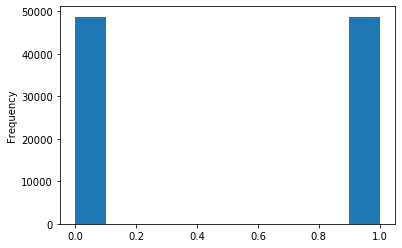

In [23]:
var_class.plot(kind='hist')

In [24]:
#As an exercise, writing function to computer the confusion matrix by hand
def my_conf_matrix(y_test,predictions_test):
    """
    Calculate the confusion matrix by hand
    """
    
    tn, fp, fn, tp = 0,0,0,0 
    y_testl = list(y_test)
    predictions_testl = list(predictions_test)
    for i in range(len(y_testl)):
        if y_testl[i] == 1 and y_testl[i] == predictions_testl[i]:
            tp += 1
        elif y_testl[i] == 1 and y_testl[i] != predictions_testl[i]:
            fn += 1
        elif y_testl[i] == 0 and y_testl[i] == predictions_testl[i]:
            tn += 1
        else:
            fp += 1
    return [[tn,fp],[fn,tp]]  

#Run function to compute confusion matrix on current model
my_conf_matrix(y_test,predictions_test)

[[987, 1403], [636, 1850]]